In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [41]:
# Load the dataset
df = pd.read_csv('/content/imdb-dataset-of-50k-movie-reviews.zip')

# Display the first few rows of the dataset
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [42]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove non-letters
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Tokenize
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into one string separated by space
    return " ".join(words)

# Apply preprocessing to the reviews
df['review'] = df['review'].apply(preprocess_text)


In [43]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


In [44]:

# Split the dataset into features and labels
X = df['review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Use TF-IDF vectorizer to convert text data to numerical data
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [46]:
# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [48]:
# Predict sentiment for test data
y_pred = svm.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.88544
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      6250
           1       0.88      0.89      0.89      6250

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Visualize the outcomes using confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Negative', 'Positive'])
disp_svm.plot(ax=ax[0])
ax[0].set_title('SVM Confusion Matrix')

plt.show()


In [14]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform length
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [16]:
# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [17]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/5
586/586 [==============================] - 210s 350ms/step - loss: 0.5787 - accuracy: 0.7107 - val_loss: 0.6183 - val_accuracy: 0.6782
Epoch 2/5
586/586 [==============================] - 209s 357ms/step - loss: 0.6002 - accuracy: 0.6879 - val_loss: 0.5289 - val_accuracy: 0.7930
Epoch 3/5
586/586 [==============================] - 207s 354ms/step - loss: 0.6099 - accuracy: 0.6738 - val_loss: 0.4756 - val_accuracy: 0.7820
Epoch 4/5
586/586 [==============================] - 196s 335ms/step - loss: 0.3876 - accuracy: 0.8335 - val_loss: 0.3554 - val_accuracy: 0.8614
Epoch 5/5
586/586 [==============================] - 197s 337ms/step - loss: 0.3004 - accuracy: 0.8788 - val_loss: 0.3170 - val_accuracy: 0.8714


In [22]:
# Convert predictions to binary values using a threshold (e.g., 0.5)
predictions = (model.predict(x= X_test, verbose = 0) > 0.5).astype(int)

In [23]:
report = classification_report(y_test,predictions)
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(report)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      6250
           1       0.84      0.92      0.88      6250

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



In [25]:
# Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true = y_test,y_pred =predictions)

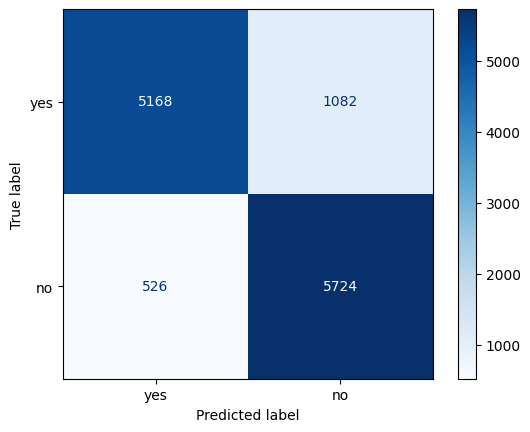

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import the matplotlib library

labels = ['yes','no']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()